### Imports

In [1]:
import numpy as np

### Loading 2D-FMC representation and train output indices

In [28]:
window_size = 100
hop_size = 2
ignore_silence = False
octave_invariant = True

from dist_rep import fmc2d

pcp_in = fmc2d.pcp_13 if octave_invariant else fmc2d.pcp_61
indices, fmc2d = fmc2d.pcp_to_fmc2ds(pcp_in, ignore_silence, window_size, hop_size)

### Loading the voices as four one-hot encoded vectors


In [29]:
octave_invariant_out = False

from dist_rep import pcp

f_hz = np.load(r"C:\Users\Jesper\Documents\local study\1-2-ml\ml-semester-project\data\jesper\dist_rep\npys\F-hz.npy")
f_hz_per_voice = [f_hz[...,i].reshape(-1,1) for i in range(4)]
f_note_per_voice = [pcp.hz_to_note_idx(f_hz_per_voice[i], octave_invariant_out) for i in range(4)]
occ = pcp.hz_to_pcp(f_hz_per_voice[0], octave_invariant_out)[0]

### Linear regression

In [30]:
from sklearn.linear_model import LinearRegression

y_v1 = f_note_per_voice[0][indices]

model = LinearRegression().fit(fmc2d, y_v1)


In [31]:
from dist_rep import fmc2d as fmc
out = model.predict([fmc.clean_fmc2d(fmc.pcp_to_fmc2d(pcp_in[(i-window_size):i,int(ignore_silence):])) for i in indices])
out = out.astype(int)

In [32]:
def train_test_voice(vidx):
    y = f_note_per_voice[vidx][indices]
    model = LinearRegression().fit(fmc2d, y)
    out = model.predict([fmc.clean_fmc2d(fmc.pcp_to_fmc2d(pcp_in[(i-window_size):i, int(ignore_silence):])) for i in indices])
    out = out.astype(int)
    out[out<0]=0
    out[out>=len(occ)]=len(occ)-1
    return out


In [33]:
out = np.hstack([train_test_voice(i) for i in range(4)])

In [34]:
out_2 = np.repeat(out, 2, axis=0)
out_freq = np.tile(np.array([0.]), out_2.shape)

import librosa

for (x, row) in enumerate(out_2):
    for (y, value) in enumerate(row):
        out_freq[x,y] = 0 if occ[out_2[x,y]]=='' else \
            librosa.note_to_hz(occ[out_2[x,y]]) 

In [35]:
import transform
import scipy.io.wavfile

audio = transform.get_audio_vector(out_freq)
scipy.io.wavfile.write('predicted.wav', 10000, audio)

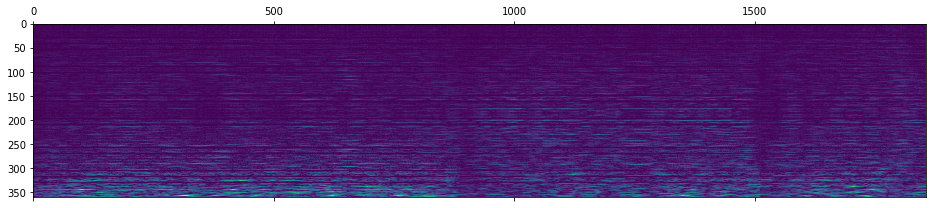

In [27]:
import matplotlib.pyplot as plt

plt.matshow(fmc2d.T)

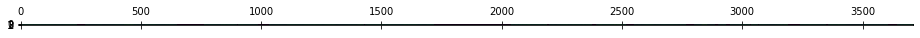

In [25]:
plt.matshow(out_2.T)

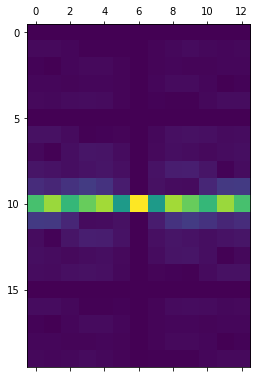

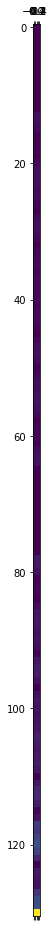

In [37]:
inp = fmc.pcp_13[3080:3100,...]
inp1 = fmc.pcp_13[3100:3120,...]
patch = fmc.pcp_to_fmc2d(inp)
patch1 = fmc.pcp_to_fmc2d(inp1)
plt.matshow(patch)
plt.matshow(fmc.clean_fmc2d(patch)[:,None])

# from scipy.spatial.distance import euclidean

# print(euclidean(patch.flatten(), patch1.flatten()))
# print(euclidean(fmc.clean_fmc2d(patch), fmc.clean_fmc2d(patch1)))


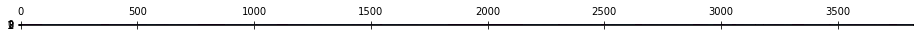

In [39]:
plt.matshow(f_hz.T)

In [40]:
patch.shape

(20, 13)